



















https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQt58gWZy98ZRVZehmTv1f5ZRMJKBexpTk5zw&usqp=CAU
21
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRfpUtKr8-J_zAqqAkc7OvSF5f8eggh20okLQ&usqp=CAU
22
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQyQIHCIt4fQs4DZF8arJAkzPERi0_3hYgc8w&usqp=CAU
23
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT28GHEcLilEjhw3eCtP0t-gJ-EWmRPSIJUmw&usqp=CAU
24
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTD8Ps3-7BELC0kvRDBThGV1KK-iHIvCltyAQ&usqp=CAU
25
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQRAh590425lkjdLUM4UBuoF_Ga_MW9h82OXw&usqp=CAU
26
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT_flKYWPDeqLFvLlcyfASWp7YmqqcaTMh90A&usqp=CAU
27
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSYfIOQa5KbckDTvopLITAC3yPHr2OkttzckA&usqp=CAU
28
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTdSW4KJdRl-jhzepZniAcTDmon_3C6qoneoA&usqp=CAU
29
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9G
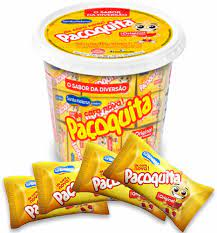
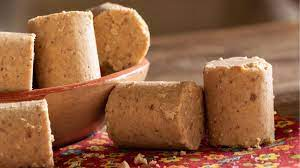
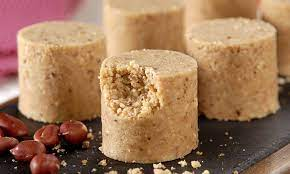
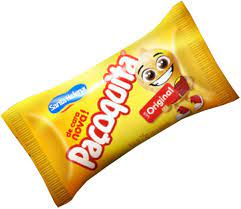
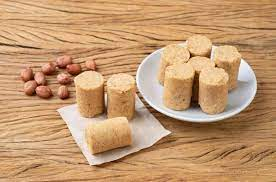
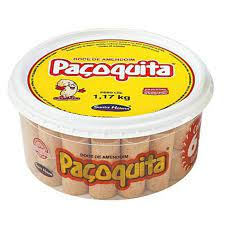
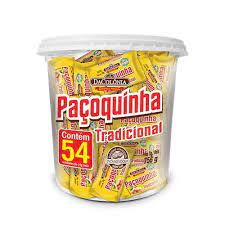
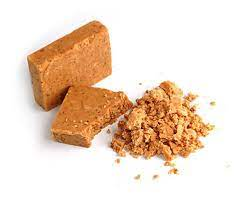
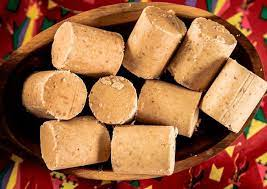
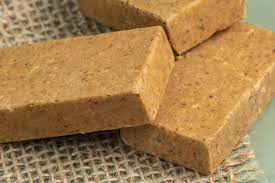
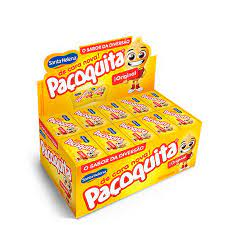
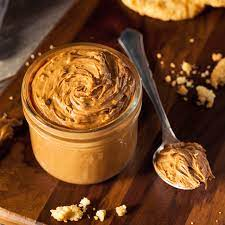
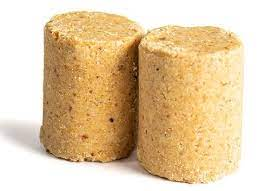
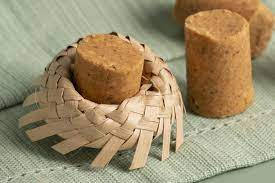
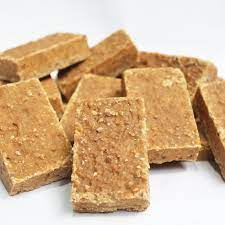
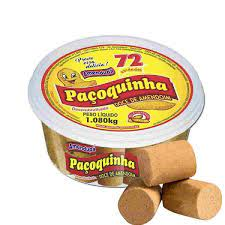
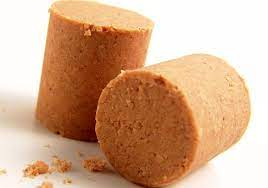
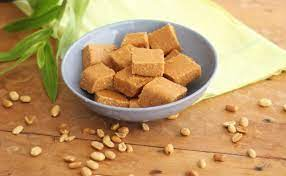
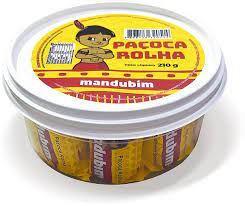
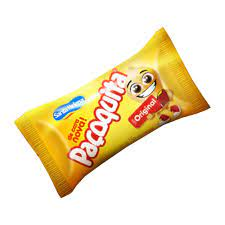

In [58]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import requests
from io import BytesIO
from PIL import Image
import base64



import pandas as pd
import time

op = webdriver.ChromeOptions()
op.add_argument('headless')
driver = webdriver.Chrome(options=op)

busca = 'paçoca'
link = f"https://www.google.com/search?q={busca}&tbm=isch"
driver.get(link)

img = []
link_img = []

n_img = 100
count = 0
for i in range(1, n_img+1):
    if n_img <= count:
        break
    if count % 10 == 0:
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    try:
        img_element = driver.find_element(By.XPATH, f"//*[@id=\"islrg\"]/div[1]/div[{str(i)}]/a[1]/div[1]/img")
        img_link = img_element.get_attribute("src")
        if img_link is None:
            img_link = img_element.get_attribute('data-src')
            if img_link is None:
                print("continua none")
        print(img_link)
        link_img.append(img_link)
        
        if "base64" in img_link:
            img_link = img_link.split(",")[1]
            img_data = base64.b64decode(img_link)
            img_pil = Image.open(BytesIO(img_data))
            img.append(img_pil)
            count += 1
            #print(count)
        else:
            img_response = requests.get(img_link)
            img_pil = Image.open(BytesIO(img_response.content))
            img.append(img_pil)
            count += 1
            print(count)
    except:
        for k in range(1, n_img-i+1):
            try:
                if count % 10 == 0:
                    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
                if n_img <= count:
                    break
                img_element = driver.find_element(By.XPATH,f"//*[@id=\"islrg\"]/div[1]/div[{str(i)}]/div[{str(k)}]/a[1]/div[1]/img")
                img_link = img_element.get_attribute("src")
                link_img.append(img_link)
                if img_link is None:
                    img_link = img_element.get_attribute('data-src')
                    if img_link is None:
                        print("continua none")
                if "base64" in img_link:
                    img_link = img_link.split(",")[1]
                    img_data = base64.b64decode(img_link)
                    img_pil = Image.open(BytesIO(img_data))
                    img.append(img_pil)
                    count += 1
                    print(count)
                else:
                    img_response = requests.get(img_link)
                    img_pil = Image.open(BytesIO(img_response.content))
                    img.append(img_pil)
                    count += 1
                    print(count)
            except:
                break

In [56]:
print(len(img), len(link_img))

100 100


In [ ]:
import matplotlib.pyplot as plt

# Exibir cada imagem na lista img
for i, img_pil in enumerate(img):
    plt.figure(figsize=(5, 5))
    plt.imshow(img_pil)
    plt.title(f'Imagem {i+1}')
    plt.axis('off')
    plt.show()